In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import streamlit as st
import plotly.express as px
import plotly
import altair as alt
import requests
import json

In [2]:
df=pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')
#df=pd.read_csv('https://raw.githubusercontent.com/soyHenry/DS-PI-ProyectoIndividual/main/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')

In [3]:
df.date=pd.to_datetime(df.date, format='%Y/%m/%d')

1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

Creando dataframe con filtro de fechas

In [4]:
mask = (df['date'] > '2020/1/1') & (df['date'] <= '2020/6/30')
df1=df.loc[mask]

Utilizaremos la columna  total_adult_patients_hospitalized_confirmed_covid debido a que reporta pacientes hospitalizados que ocupan una cama y son confirmados por laboraotrio que tienen COVID-19 

In [5]:
df3_6meses=df1[['date','state','total_adult_patients_hospitalized_confirmed_covid','total_pediatric_patients_hospitalized_confirmed_covid']].copy()
df3_6meses.reset_index(inplace=True, drop=True)
df3_6meses.rename(columns={'total_adult_patients_hospitalized_confirmed_covid':'total_adult','total_pediatric_patients_hospitalized_confirmed_covid':'total_pediatric'}, inplace=True)
df3_6meses= df3_6meses.fillna(0, axis=1)
df3_6meses['total']=df3_6meses.total_adult+df3_6meses.total_pediatric
top5_3 = df3_6meses.groupby('state').sum()
top5_3 = top5_3.sort_values(by=['total'],inplace=False, ascending=False)
top5_3.head(5)

/var/folders/qr/4qhf7vjs1mq388jh6rxzt06c0000gn/T/ipykernel_723/1443215449.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  top5_3 = df3_6meses.groupby('state').sum()


,total_adult,total_pediatric,total
state,,,
LA,40452.0,0.0,40452.0
CA,36134.0,0.0,36134.0
NV,20089.0,45.0,20134.0
AZ,5177.0,0.0,5177.0
IA,3174.0,0.0,3174.0


In [6]:
df3_6meses_pormes=df3_6meses.drop(['state','total_adult','total_pediatric'], axis=1)
df3_6meses_pormes=df3_6meses_pormes.groupby(pd.PeriodIndex(df3_6meses_pormes.date, freq='M')).sum()
df3_6meses_pormes

/var/folders/qr/4qhf7vjs1mq388jh6rxzt06c0000gn/T/ipykernel_723/2413081021.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  df3_6meses_pormes=df3_6meses_pormes.groupby(pd.PeriodIndex(df3_6meses_pormes.date, freq='M')).sum()


,total
date,
2020-01,9005.0
2020-02,0.0
2020-03,806.0
2020-04,56216.0
2020-05,24939.0
2020-06,18123.0


PUNTO 2

Se utiliza la columna total_adult_patients_hospitalized_confirmed_covid debido a que son los datos confirmados de COVID-19 

De acuerdo con las siguentes referencias compartidas por mi compañera Alicia en Slack se tiene que el periodo de cuarentena de New York es del 2020/03/01 al 2020/06/13 

<p>https://www.perfil.com/noticias/internacional/nueva-york-y-california-en-cuarentena-total-por-covid-19.phtml</p>
<p>https://elpais.com/sociedad/2021-06-15/nueva-york-celebra-el-fin-de-la-pandemia-al-levantar-las-ultimas-restricciones-vigentes.html</p> 

In [7]:
df2=df[['date','state','total_adult_patients_hospitalized_confirmed_covid']].copy()
mask2 = (df['date'] > '2020/3/01') & (df['date'] <= '2020/6/13')
df2=df2.loc[mask2]
df2=df2[df2['state']=='NY']
df2

,date,state,total_adult_patients_hospitalized_confirmed_covid
1131,2020-06-09,NY,2.0
1193,2020-06-07,NY,5.0
1442,2020-06-06,NY,5.0
1702,2020-06-11,NY,3.0
3447,2020-06-10,NY,3.0
...,...,...,...
21122,2020-06-05,NY,3.0
21135,2020-03-31,NY,NaN
21202,2020-05-01,NY,0.0
21286,2020-03-14,NY,NaN


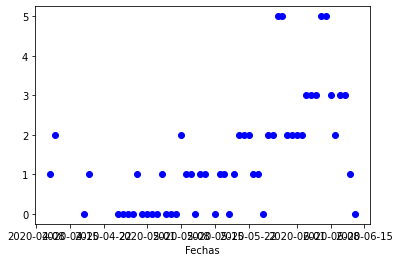

In [8]:
x=df2.date
y=df2.total_adult_patients_hospitalized_confirmed_covid
plt.figure()
plt.scatter(x,y, color='Blue')
plt.title('')
plt.ylabel('')
plt.xlabel('Fechas')
plt.show()

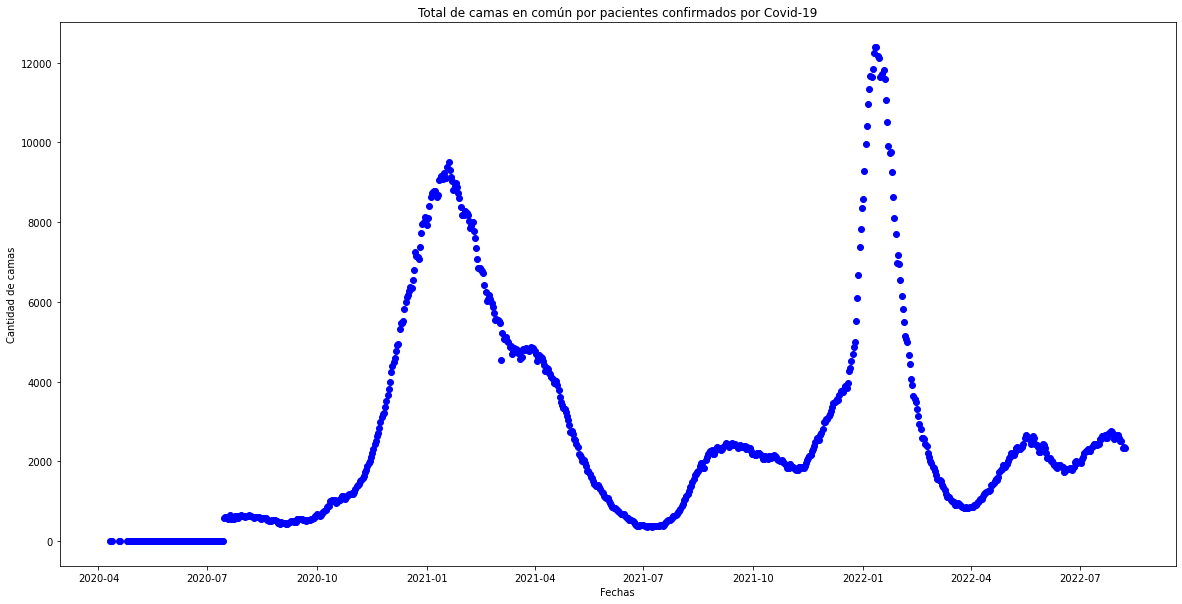

In [9]:
df2_todas=df[['date','state','total_adult_patients_hospitalized_confirmed_covid']].copy()
df2_todas=df2_todas[df2_todas['state']=='NY']
x1=df2_todas.date
y1=df2_todas.total_adult_patients_hospitalized_confirmed_covid
plt.figure(figsize=(20,10))
plt.scatter(x1,y1, color='Blue')
plt.title('Total de camas en común por pacientes confirmados por Covid-19')
plt.ylabel('Cantidad de camas')
plt.xlabel('Fechas')
plt.show()

Considerando todo el intervalor de fechas del dataframe se aprecio una mejor gráfica, en donde podemos observar que hay dos máximos, uno por el mes de febreo del 2020 y otro en el mismo mes en el año 2021, así como tres mínimos julio del 2020, julio del 2021 y abril del 2022. 
Los periodos de crecimiento son:  del 2020-04 al 2021-03, 2021-07 al 2021-08, 2021-12 al 2022-02. Los intervalos de decrecimiento son: 2021-03 al 2021-07, 2021-08 al 2021-12 y del 2022-02 al 2022-04

PUNTO 3

¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

Debido a que estamos analizando todos los pacientes confirmados con Covid-19 utilizo la columna  staffed_icu_adult_patients_confirmed_covid para realizar el conteo de camas por estado y así mostrar el top 5 de estos durante el 2020

In [10]:
mask3 = (df['date'] >= '2020/1/1') & (df['date'] <= '2020/12/31')
df3=df.loc[mask3]
df3=df3[['date','state','staffed_icu_adult_patients_confirmed_covid']].copy()
df3.reset_index(inplace=True, drop=True)
#df3.rename(columns={'total_adult_patients_hospitalized_confirmed_covid':'total_adult','total_pediatric_patients_hospitalized_confirmed_covid':'total_pediatric'}, inplace=True)
#df3= df3_6meses.fillna(0, axis=1)
df3=df3.groupby('state').sum().sort_values(by='staffed_icu_adult_patients_confirmed_covid',ascending=False).head(5)
df3=df3.rename(columns={'staffed_icu_adult_patients_confirmed_covid':'Total Camas UCI'}, inplace=False)
df3

,Total Camas UCI
state,
TX,335836.0
CA,260865.0
FL,175859.0
GA,95596.0
OH,89483.0


PUNTO 4

¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

Se utiliza la columna total_pediatric_patients_hospitalized_confirmed_covid ya que tiene a todos los pacientes pediàtricos confirmados de COVID-19

In [11]:
df4=df[['date','state','total_pediatric_patients_hospitalized_confirmed_covid']].copy()
mask_2020 = (df['date'] >= '2020/1/1') & (df['date'] <= '2020/12/31')
df4=df4.loc[mask_2020]
df4.reset_index(inplace=True, drop=True)
df4=df4.rename(columns={'total_pediatric_patients_hospitalized_confirmed_covid':'Total Camas Pediátricas'}, inplace=False)
df4=df4.dropna()
df4=df4.groupby('state').sum().sort_values(by='Total Camas Pediátricas',ascending=False).head(5)
df4


,Total Camas Pediátricas
state,
TX,12574.0
CA,9909.0
FL,7411.0
AZ,5710.0
PA,5682.0


PUNTO 5

¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

Para hallar este valor debemos tener el total de camas UCI y el total de de camas UCI con casos confirmados de COVID-19 para después realizar la división de las camas confirmadas entre el total y multiplicar por 100 para obtener el porcentaje

Utiliza la columna total_staffed_adult_icu_beds ya que es el total de las camas UCI 
y la columna staffed_icu_adult_patients_confirmed_covid porque es el total de camas UCI con casos confirmados

In [12]:
df5=df[['date','state','total_staffed_adult_icu_beds','staffed_icu_adult_patients_confirmed_covid']].copy()
mask5 = (df['date'] <= '2021/8/1')
df5=df5.loc[mask5]
df5.reset_index(inplace=True, drop=True)
df5=df5.rename(columns={'total_staffed_adult_icu_beds':'Total Camas ICU','staffed_icu_adult_patients_confirmed_covid':'Total Camas ICU Confirmada'}, inplace=False)
df5=df5.dropna()
df5.drop(df5[(df5['Total Camas ICU']==0) & (df5['Total Camas ICU Confirmada']==0)].index, inplace=True)
df5=df5.groupby('state').sum()
df5['%']=round(df5['Total Camas ICU Confirmada']*100/df5['Total Camas ICU'],2)
df5.sort_values(by='%',ascending=False).head(5)



,Total Camas ICU,Total Camas ICU Confirmada,%
state,,,
TX,2692458.0,648354.0,24.08
NV,343027.0,74249.0,21.65
AL,597171.0,125825.0,21.07
MS,296173.0,62158.0,20.99
GA,961859.0,201749.0,20.97


PUNTO 6

¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [13]:
df6=df[['date','state','deaths_covid']].copy()
mask2021=(df['date'] >= '2021/1/1') & (df['date'] <= '2021/12/31')
df6=df6.loc[mask2021]
df6.reset_index(inplace=True, drop=True)
df6=df6.rename(columns={'deaths_covid':'Muertes Covid'}, inplace=False)
df6=df6.dropna()
df6=df6.groupby('state').sum()
df6.sort_values(by='Muertes Covid',ascending=False).head(5)


,Muertes Covid
state,
CA,35108.0
TX,32889.0
FL,26004.0
NY,17620.0
AZ,16250.0


PUNTO 7

¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

Utilizaré la columna critical_staffing_shortage_today_yes y la columna deaths_covid

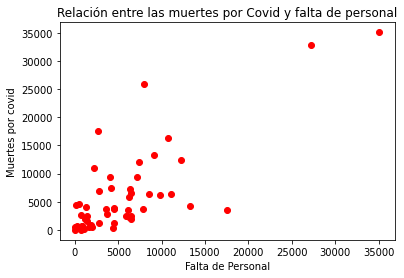

In [14]:
df7=df[['date','state','deaths_covid','critical_staffing_shortage_today_yes']].copy()
mask2021=(df['date'] >= '2021/1/1') & (df['date'] <= '2021/12/31')
df7=df7.loc[mask2021]
df7.reset_index(inplace=True, drop=True)
df7=df7.rename(columns={'deaths_covid':'Muertes Covid','critical_staffing_shortage_today_yes':'Falta de Personal'}, inplace=False)
df7=df7.dropna()
df7=df7.groupby('state').sum()
#Gráfica
x7=df7['Falta de Personal']
y7=df7['Muertes Covid']
plt.figure()
plt.scatter(x7,y7, color='Red')
plt.title('Relación entre las muertes por Covid y falta de personal')
plt.ylabel('Muertes por covid')
plt.xlabel('Falta de Personal')
plt.show()

In [15]:
df7.head(5)

,Muertes Covid,Falta de Personal
state,,
AK,614.0,843
AL,6390.0,11085
AR,3582.0,6148
AS,0.0,0
AZ,16250.0,10783


PUNTO 8

Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

Un mapa que muestre la cantidad de hospitalizados debido al COVID-19 por Estado.

In [17]:
geo_url= requests.get('https://healthdata.gov/resource/g62h-syeh.json?$where=within_circle(geocoded_state, 47.59, -122.33, 1000)')

In [18]:
#counties = alt.topo_feature(data.us_10m.url, 'counties')
#source = data.unemployment.url

alt.Chart(dfmap).mark_geoshape().encode(color='rate:Q').transform_lookup(lookup='state',from_=alt.LookupData(dfmap, 'Total Adult', ['rate'])
).project( type='albersUsa').properties(width=500,height=300)

alt.Chart(...)

Contruire una gráfica con todos los estados y el total de adultos hospitalizados

In [16]:
dfmap = df[['state','total_adult_patients_hospitalized_confirmed_covid']].copy()
dfmap.rename(columns={'total_adult_patients_hospitalized_confirmed_covid':'Total Adult'}, inplace=True)
dfmap = dfmap.fillna(0, axis=1)
dfmap = dfmap.groupby('state', as_index=False, sort=False).sum()
alt.Chart(dfmap).mark_point().encode(x='state', y='Total Adult')

alt.Chart(...)

DataFrame que involucra a los hospitalizados adultos, camas UCI, hospitalizados pediátricos y el número de muertes para realizar un mejor storytelling

<p>Juntar: </p>
    <p>-   Hospitalizados = Camas ocupadas </p>
    <p>-   Camas UCI </p>
    <p>-   Pediátricas </p>
    <p>-   Muerte </p>

In [31]:
todo=df[['date','state','total_adult_patients_hospitalized_confirmed_covid','total_pediatric_patients_hospitalized_confirmed_covid','staffed_icu_adult_patients_confirmed_covid','deaths_covid']].copy()
masktodo=((df['date'] >= '2020/6/1') & (df['date'] <= '2022/8/1'))
todo=todo.loc[masktodo]
todo.reset_index(inplace=True, drop=True)
todo.rename(columns={'total_adult_patients_hospitalized_confirmed_covid':'Total Adulto','total_pediatric_patients_hospitalized_confirmed_covid':'Total Pediatrica','staffed_icu_adult_patients_confirmed_covid':'Total Camas UCI','deaths_covid':'Muertes Covid' }, inplace=True)
todo = todo.fillna(0, axis=1)
#todo = todo.groupby('state', as_index=False, sort=False).sum()
todo['Totales']=todo['Total Adulto']+todo['Total Pediatrica']+todo['Total Camas UCI']+todo['Muertes Covid']
todo.drop(todo[todo['Total Adulto']==0].index, inplace=True)
todo


,date,state,Total Adulto,Total Pediatrica,Total Camas UCI,Muertes Covid,Totales
0,2020-12-23,PR,488.0,2.0,82.0,59.0,631.0
1,2020-12-22,OR,497.0,4.0,95.0,10.0,606.0
2,2020-10-16,VI,4.0,0.0,1.0,0.0,5.0
3,2020-10-15,VI,4.0,0.0,1.0,0.0,5.0
4,2020-10-14,PR,202.0,10.0,45.0,6.0,263.0
...,...,...,...,...,...,...,...
42313,2022-02-09,VA,1952.0,26.0,407.0,31.0,2416.0
42315,2022-02-05,CA,10759.0,362.0,2067.0,57.0,13245.0
42316,2022-02-20,NM,378.0,6.0,101.0,2.0,487.0
42317,2022-02-03,ND,307.0,7.0,51.0,2.0,367.0


In [20]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

Gráfica concatenada solo interactiva

In [ ]:
puntos=alt.Chart(todo).mark_point().encode(x='date', y='Total Adulto', color='state').interactive()
barras=alt.Chart(todo).mark_bar().encode(x='average(Total Adulto)', y='state', color='state').interactive()
alt.vconcat(puntos,barras)

Gráfica concatenada con filtro

In [ ]:
filtro=alt.selection_interval()
puntos=alt.Chart(todo).mark_point().encode(x='date', y='Total Adulto', color=alt.condition(filtro,'state', alt.value('lightgray'))).properties(selection=filtro).interactive()
barras=alt.Chart(todo).mark_bar().encode(x='average(Total Adulto)', y='state', color='state').transform_filter(filtro)
alt.vconcat(puntos,barras)

<p> PUNTO 8 </p>
Peor mes del 2020 hospitalizados adultos y pediátricos

In [32]:
mask = (df['date'] > '2020/1/1') & (df['date'] <= '2020/12/31')
df1=df.loc[mask]
df3_6meses=df1[['date','state','total_adult_patients_hospitalized_confirmed_covid','total_pediatric_patients_hospitalized_confirmed_covid']].copy()
df3_6meses.reset_index(inplace=True, drop=True)
df3_6meses.rename(columns={'total_adult_patients_hospitalized_confirmed_covid':'total_adult','total_pediatric_patients_hospitalized_confirmed_covid':'total_pediatric'}, inplace=True)
df3_6meses= df3_6meses.fillna(0, axis=1)
df3_6meses['total']=df3_6meses.total_adult+df3_6meses.total_pediatric
df3_6meses_pormes=df3_6meses.drop(['state','total_adult','total_pediatric'], axis=1)
df3_6meses_pormes=df3_6meses_pormes.groupby(pd.PeriodIndex(df3_6meses_pormes.date, freq='M')).sum()
df3_6meses_pormes

/var/folders/qr/4qhf7vjs1mq388jh6rxzt06c0000gn/T/ipykernel_723/2326529618.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  df3_6meses_pormes=df3_6meses_pormes.groupby(pd.PeriodIndex(df3_6meses_pormes.date, freq='M')).sum()


,total
date,
2020-01,9005.0
2020-02,0.0
2020-03,806.0
2020-04,56216.0
2020-05,24939.0
2020-06,18123.0
2020-07,767327.0
2020-08,1210668.0
2020-09,822998.0


El peor mes fue en diciembre ya que fue el máximo de hospitalizados confirmados con Covid-19, sin embargo, si solo tomamos los primeros seis meses que menconar el punto 1 entonces abril sería el peor mes del 2020